 # Top 100 Best Selling Books in Amazon from 2009 to 2021

The data set includes top 100 best selling titles from Amazon. The analysis period is from 2009 to 2021. 
The fields available are s_no, price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import the dataset

In [2]:
url = 'C:\ANJALI\Anjali_Learning\Data Projects\Amazon_top100_bestselling_books_2009to2021_analysed.xlsx'

In [3]:
df = pd.read_excel(url)

In [6]:
df.columns

Index(['S_no', 'price', 'ranks', 'title', 'no_of_reviews', 'ratings', 'author',
       'cover_type', 'year', 'genre'],
      dtype='object')

In [4]:
df.drop(columns=['S_no'],axis=1,inplace =True)

In [5]:
df.shape

(1286, 9)

In [27]:
# To find the number of unique titles in the data set
df['title'].nunique()

744

In [6]:
df.dtypes

price            float64
ranks              int64
title             object
no_of_reviews      int64
ratings          float64
author            object
cover_type        object
year               int64
genre             object
dtype: object

### Analysing the statistical information of dataframe fields

In [7]:
df.describe()
# Statistical information of all numeric fields

,price,ranks,no_of_reviews,ratings,year
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,13.760467,50.225505,25847.148523,4.650933,2015.023328
std,10.049580,28.804839,32229.048100,0.197245,3.738463
min,1.170000,1.000000,50.000000,3.400000,2009.000000
25%,8.550000,25.000000,6790.000000,4.600000,2012.000000
50%,12.105000,50.000000,16845.000000,4.700000,2015.000000
75%,16.290000,75.000000,32326.000000,4.800000,2018.000000
max,144.000000,100.000000,344811.000000,4.900000,2021.000000


In [8]:
#Get the statistical information on categorical variables
df.describe(include = 'object')

,title,author,cover_type,genre
count,1286,1286,1286,1285
unique,744,503,8,3
top,StrengthsFinder 2.0,Rick Riordan,Hardcover,Non Fiction
freq,11,20,642,723


### 3. Check for missing values in the data

In [9]:
df.isnull().any()

price            False
ranks            False
title            False
no_of_reviews    False
ratings          False
author           False
cover_type       False
year             False
genre             True
dtype: bool

In [10]:
df.isnull().sum()

price            0
ranks            0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
genre            1
dtype: int64

### 4. Replace missing value with appropriate data

In [11]:
df['genre'].unique()

array(['Fiction', 'Non Fiction', 'unknown', nan], dtype=object)

In [12]:
df['genre'].fillna("Not specified",inplace = True)

In [13]:
df.isnull().sum()

price            0
ranks            0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
genre            0
dtype: int64

In [14]:
df['genre'].value_counts()

Non Fiction      723
Fiction          560
unknown            2
Not specified      1
Name: genre, dtype: int64

### 5. Check for outliers in price, ratings and number of reviews

<AxesSubplot:xlabel='no_of_reviews'>

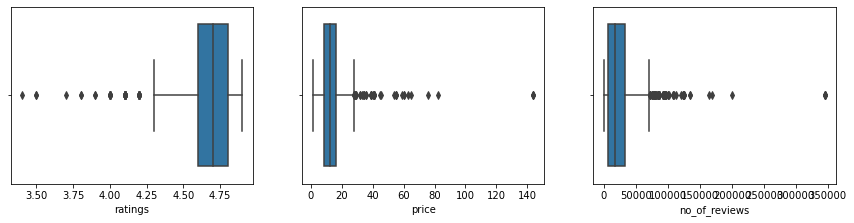

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(x="ratings",data=df)

plt.subplot(4,4,2)
sns.boxplot(x="price",data=df)

plt.subplot(4,4,3)
sns.boxplot(x="no_of_reviews",data=df)

### 6. Change in the average price of the best sellers over the analysis period based on genre

The Pivot table shows the change in mean value of the price of Fiction and Non Fiction categories of the best selling books in Amazon. 


In [18]:
# Get the required fields for analysis
df_test = df[['year','genre','price']]
#Remove the data for genre not specified or unknown
genre_reqd =['Fiction','Non Fiction']
df_reqd = df_test.loc[df_test['genre'].isin(genre_reqd)]
#df_reqd
#Group the data based on year and genre and get the mean price
df_group = df_reqd.groupby(['year','genre'],as_index = False).mean()

#df_group
grouped_pivot = df_group.pivot_table(index = 'year',columns ='genre',values='price')
grouped_pivot

genre,Fiction,Non Fiction
year,,
2009,17.816122,15.557500
2010,13.405238,17.785455
2011,16.160233,16.849455
2012,16.166750,17.047966
2013,14.284146,18.442542
2014,13.516491,18.199524
2015,9.959000,14.545667
2016,12.083696,11.156863
2017,10.811395,12.191429


### 7. Visualisation of trend in average price of the best sellers during the analysis period

Creating line plots to identify the change in average price of fiction and non fiction books from 2009 to 2021

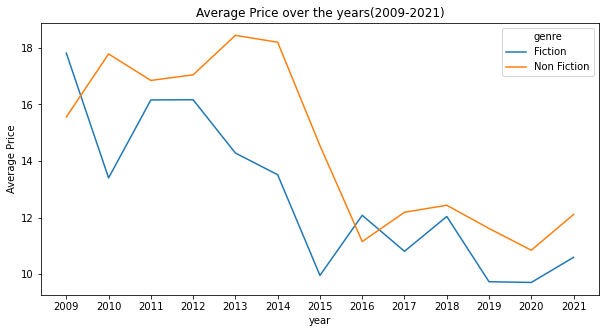

In [19]:
ax = grouped_pivot.plot(xticks = grouped_pivot.index,ylabel ='Average Price',figsize=(10,5),title='Average Price over the years(2009-2021)')
             
#sns.lineplot(data= grouped_pivot)

<AxesSubplot:title={'center':'Mean price of books based on genre and year'}, xlabel='year'>

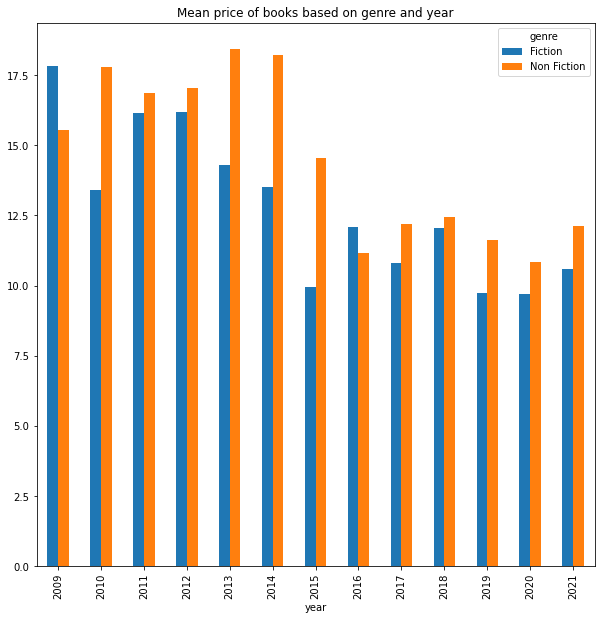

In [20]:
grouped_pivot.plot.bar(figsize=(10,10),title='Mean price of books based on genre and year')


### 8. Binning of Ratings into Low Medium and Good- Numerical variables into Categorical Variables

In [21]:
#Fixing the bins 
bins = np.linspace(min(df['ratings']),max(df['ratings']),4)
group_names = ['Low','Medium','High']
df['ratings_binned'] = pd.cut(df['ratings'],bins,labels=group_names,include_lowest = True)
df.head()

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,ratings_binned
0,12.49,1,The Lost Symbol,16118,4.4,Dan Brown,Hardcover,2009,Fiction,Medium
1,13.40,2,The Shack: Where Tragedy Confronts Eternity,23392,4.7,William P. Young,Paperback,2009,Fiction,High
2,9.93,3,Liberty and Tyranny: A Conservative Manifesto,5036,4.8,Mark R. Levin,Hardcover,2009,Non Fiction,High
3,14.30,4,"Breaking Dawn (The Twilight Saga, Book 4)",16912,4.7,Stephenie Meyer,Hardcover,2009,Fiction,High
4,9.99,5,Going Rogue: An American Life,1572,4.6,Sarah Palin,Hardcover,2009,Non Fiction,High


array([1126,  152,    8], dtype=int64)

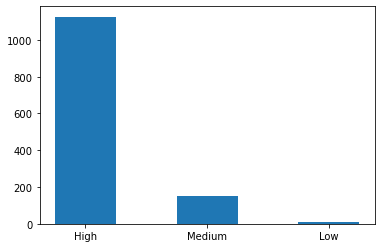

In [22]:
categories = df['ratings_binned'].value_counts().index
counts = df['ratings_binned'].value_counts().values
plt.bar(categories,counts,width =0.5)
categories
counts

### 9. Grouping of data for identifying unique titles

In [23]:
#New dataframe with required fields only
df_test_title = df[['title','author','ratings','price']] 


In [24]:
#Group by title and obtain the mean values
df_group_title = df_test_title.groupby(['title'],as_index = False).mean()
df_group_title


,title,ratings,price
0,1984,4.7,7.48
1,10-Day Green Smoothie Cleanse,4.7,9.05
2,10-Day Green Smoothie Cleanse: Lose Up to 15 P...,4.7,25.75
3,11/22/63: A Novel,4.7,16.43
4,12 Rules for Life: An Antidote to Chaos,4.8,18.14
...,...,...,...
739,Xanathar's Guide to Everything (Dungeons & Dra...,4.9,32.99
740,Yes Please,4.3,15.99
741,You Are a Badass: How to Stop Doubting Your Gr...,4.7,8.45
742,ZEALOT: The Life and Times of Jesus of Nazareth,4.4,16.50


In [25]:
df_group_title['title'].nunique()
#df_group_title_fiction['title'].nunique()

744

In [26]:
# Categorise individual title into High,Medium and Low based on average ratings and Expensive
# Affordable and Low Priced based on average price

bins1 = np.linspace(min(df['ratings']),max(df['ratings']),4)
bins2 = np.linspace(min(df['price']),max(df['price']),4)
group_names1 = ['Low','Medium','High']
group_names2 = ['Low Priced','Affordable','Expensive']
df_group_title['rating_tag'] = pd.cut(df_group_title['ratings'],bins1,labels=group_names1,include_lowest = True)
df_group_title['price_tag'] = pd.cut(df_group_title['price'],bins2,labels=group_names2,include_lowest = True)

In [27]:
df_group_title

,title,ratings,price,rating_tag,price_tag
0,1984,4.7,7.48,High,Low Priced
1,10-Day Green Smoothie Cleanse,4.7,9.05,High,Low Priced
2,10-Day Green Smoothie Cleanse: Lose Up to 15 P...,4.7,25.75,High,Low Priced
3,11/22/63: A Novel,4.7,16.43,High,Low Priced
4,12 Rules for Life: An Antidote to Chaos,4.8,18.14,High,Low Priced
...,...,...,...,...,...
739,Xanathar's Guide to Everything (Dungeons & Dra...,4.9,32.99,High,Low Priced
740,Yes Please,4.3,15.99,Medium,Low Priced
741,You Are a Badass: How to Stop Doubting Your Gr...,4.7,8.45,High,Low Priced
742,ZEALOT: The Life and Times of Jesus of Nazareth,4.4,16.50,Medium,Low Priced


array([628, 110,   6], dtype=int64)

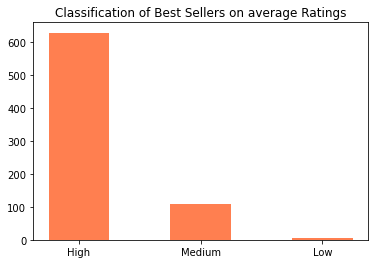

In [28]:
#Visualise the data in a bar chart
cat_ratings = df_group_title['rating_tag'].value_counts().index
counts_ratings = df_group_title['rating_tag'].value_counts().values
plt.bar(cat_ratings,counts_ratings,width =0.5,color='coral')
plt.title('Classification of Best Sellers on average Ratings')
#categories
counts_ratings

array([735,   8,   1], dtype=int64)

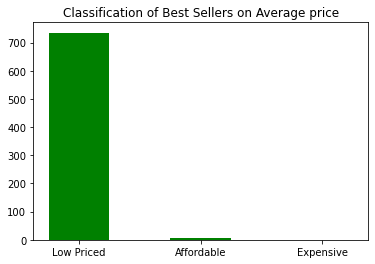

In [29]:
#Visualise the data using bar chart
cat_price = df_group_title['price_tag'].value_counts().index
counts_price = df_group_title['price_tag'].value_counts().values
plt.bar(cat_price,counts_price,width =0.5,color ='green')
plt.title('Classification of Best Sellers on Average price')

counts_price

### 10. Find the author with maximum number of publications that arrived in the best sellers list during the analysis period

In [30]:
author_data = df['author'].value_counts()
author_df=author_data.to_frame()
author_df.rename(columns={'author':'Books Published'},inplace =True)

author_df.head(10)

,Books Published
Rick Riordan,20
Jeff Kinney,17
Suzanne Collins,17
John Grisham,15
Dr. Seuss,13
American Psychological Association,13
Gary Chapman,13
Gallup,13
Bill Martin Jr.,12
Malcolm Gladwell,12


### 11. To identify the title that appeared most in the best sellers list during the analysis period

In [31]:
title_data = df['title'].value_counts()

title_df=title_data.to_frame()
title_df.rename(columns={'title':'Appearences'},inplace =True)
title_df.head(10)

,Appearences
StrengthsFinder 2.0,11
"Publication Manual of the American Psychological Association, 6th Edition",11
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change,10
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),10
Love You Forever,9
How to Win Friends & Influence People,9
What to Expect When You're Expecting,9
The Official SAT Study Guide,9
The Great Gatsby: The Only Authorized Edition,9
The Very Hungry Caterpillar,9
